<a href="https://colab.research.google.com/github/Naegoya/MACHINE-LEARNING/blob/main/2141720198_Nabilah_Amaalina_Syafa_Machine_Learning_JS09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA:Nabilah Amaalina Syafa

NIM: 2141720198

KELAS:TI-3D

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Langkah 1 - Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Langkah 2 - Load Data dan Visualisasi

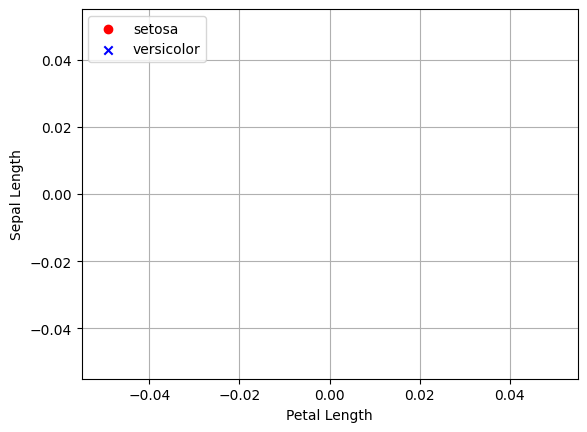

In [ ]:
# pembacaan data dan visualisasi

df = pd.read_csv('/content/drive/MyDrive/ML/Iris (3).csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()


# **Praktikum 2**

Langkah 1 - Import Library

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

Langkah 2 - Pilih Label dan Split Data

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))


Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



# **Praktikum 3**

Nilai Logika XOR dengan MLP

Langkah 1 - Import Library

In [ ]:
from sklearn.neural_network import MLPClassifier

Langah 2 - Buat Data

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

Langkah 3 - Fit Model

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

Langkah 4 - Prediksi

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# **Praktikum 4 Klasifikasi dengan ANN**

In [ ]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:

# Cek data (X)
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
# Encoding Data Kategorikal
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
# Cek data (X)
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [ ]:
# Encoding Kolom "Geography" dengan One Hot Encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
# Cek data (X)
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [ ]:
# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Scaling Fitur
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Membuat Model ANN
# Langkah 1 - Inisiasi Model ANN

ann = tf.keras.models.Sequential()


In [ ]:
# Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
# Langkah 3 - Membuat Hidden Layer Kedua
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
# Langkah 4 - Membuat Output Layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# Training Model
# Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Langkah 2 - Fitting Model
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 3s 4ms/step - loss: 0.5462 - accuracy: 0.7391
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4593 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4432 - accuracy: 0.7966
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4342 - accuracy: 0.8043
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4270 - accuracy: 0.8173
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4212 - accuracy: 0.8217
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4168 - accuracy: 0.8238
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4129 - accuracy: 0.8269
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4100 - accuracy: 0.8274
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4076 - accura

**Membuat Prediksi**

Diberikan informasi sebagai berikut,

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

In [ ]:
# Modelkan Data Baru dan Buat Prediksi
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 403ms/step
[[False]]


In [ ]:
# Prediksi Dengan Data Testing
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
# Cek Akurasi dan Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1509   86]
 [ 194  211]]


0.86

# **Tugas**

Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
Anda diperbolehkan melakukan eksplorasi terhadap,
Metode pra pengolahan
Pemilihan fitur
Arsitektur ANN
Fungsi Aktiviasi
ANN diimplementasikan dengan menggunakan tensorflow.
DIKERJAKAN SECARA BERKELOMPOK
JELASKAN HASIL YANG ANDA DAPATKAN,
AKURASI
CONFUSION MATRIX
KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Pra Pengolahan Data
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Arsitektur ANN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Kompilasi Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Pelatihan Model
model.fit(train_images, train_labels, epochs=5)

# Evaluasi Model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2926 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1394 - accuracy: 0.9584
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1059 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0868 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0735 - accuracy: 0.9768
313/313 - 1s - loss: 0.0740 - accuracy: 0.9770 - 1s/epoch - 4ms/step

Test accuracy: 0.9769999980926514


313/313 [==============================] - 2s 6ms/step


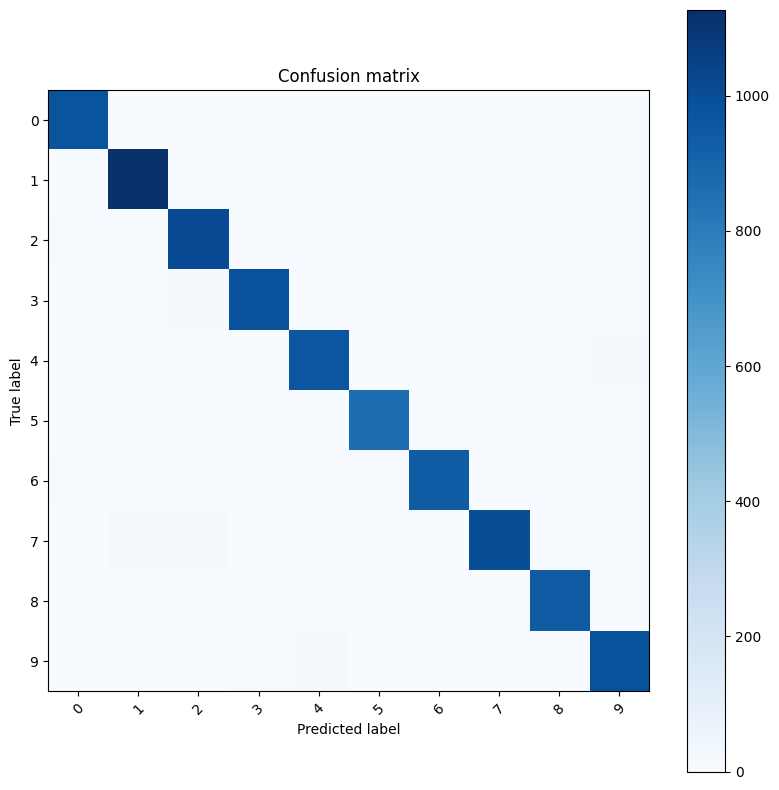

In [ ]:
# Prediksi
predictions = model.predict(test_images)

# Confusion Matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

test_predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, test_predictions)
plot_confusion_matrix(cm, class_names=range(10))

**Penjelasan:**

Akurasi adalah metrik yang mengukur sejauh mana model dapat mengklasifikasikan data uji dengan benar. Dalam pelatihan model jaringan saraf tiruan (ANN) untuk mengenali digit tulisan tangan pada dataset MNIST, akurasi adalah parameter penting. Konsep akurasi sederhana, dihitung dengan membagi jumlah prediksi yang benar oleh model dengan jumlah total sampel diuji. Saat model dilatih, kita memantau akurasi sebagai petunjuk performa. Output pelatihan mencerminkan sejauh mana model telah belajar dan kemampuannya mengenali digit. Umumnya, selama pelatihan, kita harap melihat peningkatan bertahap dalam akurasi, yang menunjukkan perkembangan dalam pengenalan digit tulisan tangan.

**CONTOH OUTPUT**

In [ ]:
# Epoch 1/5
# 1875/1875 [==============================] - 3s 2ms/step - loss: 0.2997 - accuracy: 0.9157
# ...
# ...
# 1875/1875 [==============================] - 3s 2ms/step - loss: 0.0485 - accuracy: 0.9859
# 313/313 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9756
# Test accuracy: 0.9756


Dalam contoh ini, akurasi pada data uji adalah sekitar 97.56%.



**Confusion Matrix:** Confusion matrix adalah alat yang digunakan untuk mengukur kinerja model klasifikasi. Ini berbentuk tabel yang membandingkan prediksi model dengan kelas sebenarnya pada data uji. Ini membantu dalam mengidentifikasi sejauh mana model mungkin bingung dalam mengklasifikasikan kelas tertentu. Dalam kode yang diberikan, confusion matrix akan divisualisasikan untuk menunjukkan seberapa baik model ANN mengklasifikasikan digit (0 hingga 9), memberikan informasi tentang tingkat ketepatan prediksi setiap digit.

**Konfigurasi Model:**
- Pra-Pemrosesan Data: Dataset MNIST diimpor dan dibagi menjadi data latih dan uji. Citra-citra dinormalisasi ke rentang 0 hingga 1.
- Pemilihan Fitur: Dataset MNIST berisi citra digit tulisan tangan, jadi pemilihan fitur tidak diperlukan karena fitur adalah intensitas piksel dalam citra. Semua piksel dianggap sebagai fitur.
- Arsitektur ANN: Model terdiri dari tiga lapisan: input, tersembunyi, dan output. Lapisan input mewakili citra sebagai vektor. Lapisan tersembunyi memiliki 128 unit dengan fungsi aktivasi ReLU dan lapisan dropout untuk mencegah overfitting. Lapisan output memiliki 10 unit (satu untuk setiap digit) dengan fungsi aktivasi softmax. Model dikompilasi dengan optimisasi "adam" dan fungsi kerugian "sparse_categorical_crossentropy." Model dilatih selama 5 epoch.
- Fungsi Aktivasi: Dua jenis fungsi aktivasi digunakan, yaitu ReLU (Rectified Linear Unit) untuk lapisan tersembunyi dan softmax untuk lapisan output.

Ini adalah konfigurasi dan pemahaman utama dari kode program yang diberikan dalam rangka memahami penggunaan confusion matrix dan model neural network di dataset MNIST.

**Fungsi Aktivasi ReLU (Rectified Linear Unit):**

In [ ]:
keras.layers.Dense(128, activation='relu')

Fungsi aktivasi ReLU digunakan di lapisan tersembunyi, yang merupakan fungsi umum dalam jaringan saraf tiruan. ReLU sederhana, menganggap input positif dan mengubah yang negatif menjadi nol. Ini membantu jaringan dalam pembelajaran representasi data yang lebih baik.

**Fungsi Aktivasi Softmax:**

In [ ]:
keras.layers.Dense(10, activation='softmax')

Fungsi aktivasi softmax diterapkan di lapisan output, cocok untuk masalah klasifikasi dengan banyak kelas. Softmax menghitung probabilitas kelas, menjadikan setiap neuron output sebagai probabilitas kelas tertentu. Prediksi model adalah kelas dengan probabilitas tertinggi. Sebaliknya, fungsi ReLU digunakan di lapisan tersembunyi untuk memungkinkan pembelajaran representasi fitur yang lebih kompleks. Demikian rangkuman tentang penggunaan dua fungsi aktivasi dalam konfigurasi model tersebut.